# **Deep Learning Final Project: Fruit Image Classification**

This project is to create a convolutional neural network (CNN) to classify images based on the type of fruit: peaches, pomegranates, or strawberries. This is the final project for the course IBM Deep Learning on Coursera, as part of the IBM Machine Learning Professional Certificate.

## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Import-libraries">Import libraries</a></li>
    <li><a href="#Load-Data">Load Data</a></li>
    <li><a href="#Prepare-training-and-test-data">Prepare training and test data</a></li>
    <li><a href="#Model-creation">Model creation</a></li>
        <ol>
            <li><a href="#Model-1-CNN">Model 1</a></li>
            <li><a href="#Model-2-CNN">Model 2</a></li>
            <li><a href="#Model-3-CNN">Model 3</a></li>
        </ol>
    <li><a href="#Summary-and-Key-Insights-and-Findings">Summary and Key Insights and Findings</a></li>
    <li><a href="#Next-Steps">Next Steps</a></li>
</ol>



## Objectives

I will use a dataset containing images of fresh peaches, pomegranates, and strawberries with labeled classes. My goal is to see if I can create a convolutional neural network that can distinguish between the three types of fruit. This is a very basic and limited task, but I want to start with something as simple as possible since it's my first CNN!

## Import libraries

In [173]:
import warnings
warnings.simplefilter('ignore')
from glob import glob
import PIL
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

## Load Data

I have downloaded data from this page: https://www.kaggle.com/datasets/alihasnainch/fruits-dataset-for-classification/data
The archive folder contains six subdirectories, three for fresh fruits of each class and three for rotten fruits. For this project, I will only use the fresh fruits directories.

In [2]:
data_dir = 'archive/'

In [6]:
dirs = glob(data_dir +'fresh_*')

To process the data for use in the CNN, I will create lists for the individual pictures, 3D numpy arrays for each image (containing the RGB values at each pixel), and a list of the classes for each image. I will show the first image from each class just to visualize what I'm looking at here.

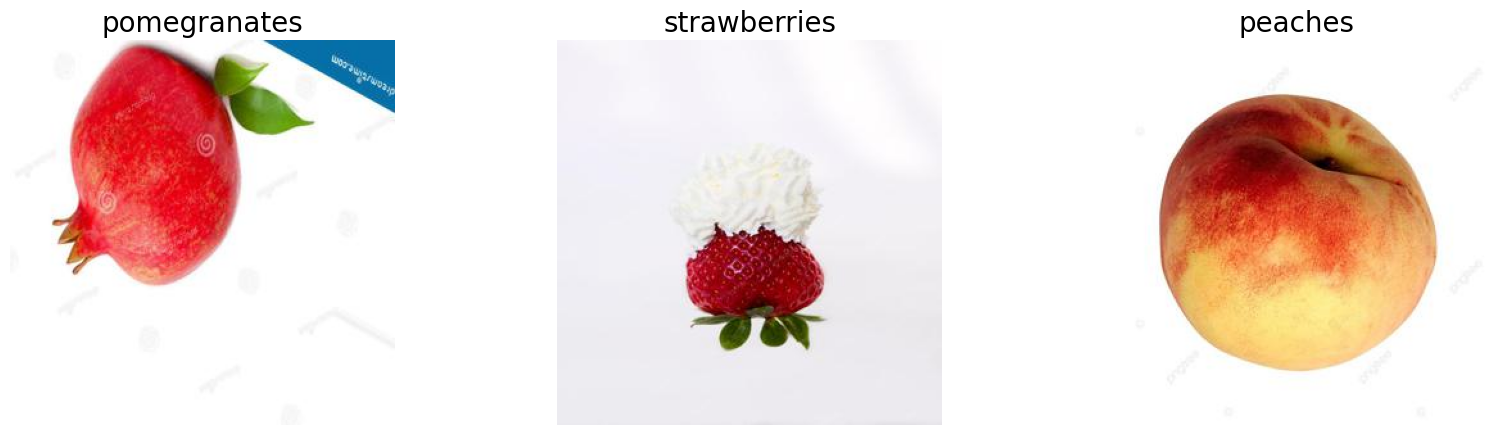

In [42]:
pics = list()
pics_arr = list()
p_class = list()

plt.figure(figsize=(20,5))
for idx, dir in enumerate(dirs):
    imglist = list(glob(dir+'/*')) 
    clss = dir.split('_')[1]
    plt.subplot(1,3,idx+1)
    plt.imshow(PIL.Image.open(imglist[0]))
    plt.title(clss, fontsize=20)
    plt.axis('off')
    for img in imglist:
        pic = PIL.Image.open(img)
        pic_arr = np.array(pic)
        pics.append(pic)
        pics_arr.append(pic_arr)
        p_class.append(clss)

What does my data look like?

In [47]:
np.shape(pics_arr)

(811, 300, 300, 3)

So the list of arrays has 811 total samples, with each image array being size 300x300x3 (300 pixels width and length, with an RGB vector at each). I should double check that my list of classes is the right length too

In [48]:
len(p_class)

811

Okay good, I have 811 samples total. but what is the number of each class?

In [55]:
pd.DataFrame(p_class).value_counts()

pomegranates    311
peaches         250
strawberries    250
Name: count, dtype: int64

So I have a slightly higher number of pomegranate images but I think it's reasonably balanced enough for my purposes.

## Prepare training and test data

Well first I need to create my target variable in a way that the CNN will be able to digest, so instead of names of the fruits I'm going to do one hot encoding:

In [65]:
cat = OneHotEncoder()
y=np.array(p_class, dtype=object).T
y = cat.fit_transform(y.reshape(-1, 1)).toarray()

Now I'm ready to split the data into training and test sets. My X will be the image arrays (pics_arr)

In [80]:
X = np.array(pics_arr)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let me see how many of each category are in my training set:

In [75]:
pd.DataFrame(cat.inverse_transform(y_train)).value_counts()

pomegranates    250
strawberries    204
peaches         194
Name: count, dtype: int64

Close enough!

In [76]:
num_classes=3

## Model creation

### Model 1 CNN

In [82]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,263,779 (81.11 MB)

 Trainable params: 21,263,779 (81.11 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.3890 - loss: 209.3592 - val_accuracy: 0.4724 - val_loss: 2.3691
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6779 - loss: 1.3092 - val_accuracy: 0.4049 - val_loss: 1.9342
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7710 - loss: 0.7322 - val_accuracy: 0.5521 - val_loss: 1.6548
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7725 - loss: 2.5588 - val_accuracy: 0.6442 - val_loss: 1.1547
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8540 - loss: 0.4024 - val_accuracy: 0.5583 - val_loss: 1.5357
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7985 - loss: 0.6404 - val_accuracy: 0.5583 - val_loss: 2.0238
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7987 - loss: 6.5788 - val_accuracy: 0.5890 - val_loss: 1.7172
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8810 - loss: 0.5514 - val_accuracy: 0.5951 - val_los

model_1.

In [101]:
y_pred = model_1.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step


In [105]:
y_pred_labels = cat.inverse_transform(y_pred)
y_test_labels = cat.inverse_transform(y_test)

In [158]:
confusion_matrix = metrics.confusion_matrix(y_test_labels, y_pred_labels,normalize='true')

In [159]:
confusion_matrix

array([[0.60714286, 0.14285714, 0.25      ],
       [0.16393443, 0.72131148, 0.1147541 ],
       [0.08695652, 0.15217391, 0.76086957]])

In [160]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['peaches','pomegranates','strawberries'])

Text(0.5, 0, 'Predicted Label')

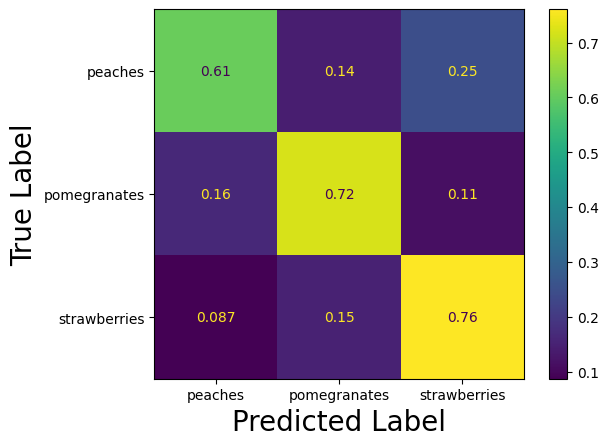

In [161]:
cm_display.plot()
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)

Looks like the model does the best on strawberries and worst on peaches. Images of peaches appear to be often misclassified as strawberries. 
(Note: I double checked the order of my labels by printing the length of the predicted values for each class and comparing with the unnormalized confusion matrix. For simplicity of presentation I have removed those cells from the notebook)

Does the confusion matrix look better when only considering the more confident predictions (let's say probability greater than 90%)?

In [162]:
confident_predictions = y_pred[np.max(y_pred,axis=1)>0.9]
confident_truth = y_test[np.max(y_pred,axis=1)>0.9]

In [163]:
conf_pred_labels = cat.inverse_transform(confident_predictions)
conf_test_labels = cat.inverse_transform(confident_truth)

In [164]:
confusion_matrix = metrics.confusion_matrix(conf_test_labels, conf_pred_labels,normalize='true')

In [165]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['peaches','pomegranates','strawberries'])

Text(0.5, 0, 'Predicted Label')

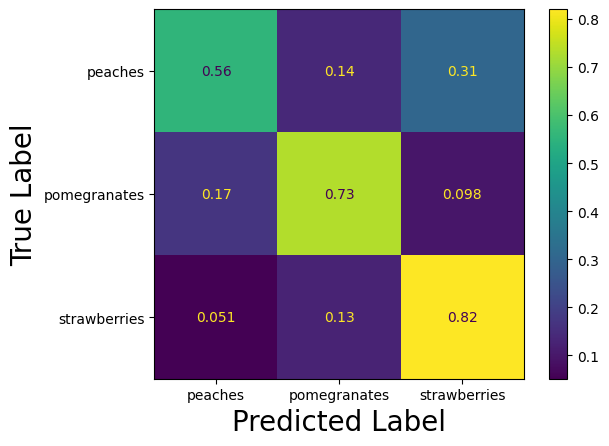

In [166]:
cm_display.plot()
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)

Interesting, it isn't any better! So there are some fairly confidently mislabeled classes!

### Model 2 CNN

In [167]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [168]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 300, 300, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 298, 298, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 298, 298, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 149, 149, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 149, 149, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 147, 147, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 147, 147, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 341056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   174,621,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,688,291 (666.38 MB)

 Trainable params: 174,688,291 (666.38 MB)

 Non-trainable params: 0 (0.00 B)

In [170]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [172]:
model_2.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 419s 18s/step - accuracy: 0.3932 - loss: 3017.6360 - val_accuracy: 0.5092 - val_loss: 1.3721
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 369s 17s/step - accuracy: 0.6172 - loss: 1.8007 - val_accuracy: 0.6380 - val_loss: 0.9160
Epoch 3/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 341s 16s/step - accuracy: 0.7358 - loss: 0.6126 - val_accuracy: 0.6196 - val_loss: 0.9402
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 355s 17s/step - accuracy: 0.7689 - loss: 0.6252 - val_accuracy: 0.6442 - val_loss: 0.9317
Epoch 5/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 366s 17s/step - accuracy: 0.7706 - loss: 0.6117 - val_accuracy: 0.5890 - val_loss: 1.3506


Oh no! This was a much slower model to train but with lower accuracy! Let me see the confusion matrix.

6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


Text(0.5, 0, 'Predicted Label')

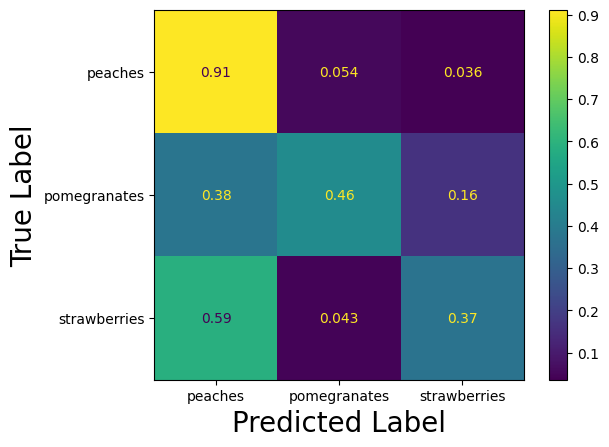

In [178]:
y_pred = model_2.predict(X_test)
y_pred_labels = cat.inverse_transform(y_pred)
y_test_labels = cat.inverse_transform(y_test)
confusion_matrix = metrics.confusion_matrix(y_test_labels, y_pred_labels, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['peaches','pomegranates','strawberries'])
cm_display.plot()
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)

Interesting! It's done a great job learning peaches! But the other classes not so much. Also, it seems like the reason it has such a high accuracy on peaches is because it just guesses that lots of things are peaches.

In [179]:
len(y_pred_labels[y_pred_labels=='peaches'])/len(y_pred_labels)

0.6196319018404908

It guessed that 62 percent of the images were peaches! Not sure why this happened or how to fix it. Maybe it needed more training epochs, but this already took a really long time on my laptop with 5 so I'm not going to do more right now.

### Model 3 CNN

Since Model 1 seemed to do better than Model 2, I'm going to start with what I had for Model 1 and just change a little and see what happens. I am just removing a little bit and changing one of the dense layers. 

In [188]:
model_3 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_3.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))

## 2x2 max pooling reduces and dropout
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

## Flatten 
model_3.add(Flatten())
model_3.add(Dense(256))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 180000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    46,080,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           771 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,083,459 (175.79 MB)

 Trainable params: 46,083,459 (175.79 MB)

 Non-trainable params: 0 (0.00 B)

In [189]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_3.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.3533 - loss: 3025.0757 - val_accuracy: 0.7607 - val_loss: 50.9468
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 934ms/step - accuracy: 0.7015 - loss: 63.5132 - val_accuracy: 0.6258 - val_loss: 32.0785
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7716 - loss: 11.1076 - val_accuracy: 0.8098 - val_loss: 1.0426
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 942ms/step - accuracy: 0.7820 - loss: 2.5534 - val_accuracy: 0.7853 - val_loss: 1.9499
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 954ms/step - accuracy: 0.7583 - loss: 1.6750 - val_accuracy: 0.8221 - val_loss: 0.6875
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 929ms/step - accuracy: 0.7510 - loss: 1.7562 - val_accuracy: 0.8037 - val_loss: 1.6329
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 981ms/step - accuracy: 0.7850 - loss: 1.7322 - val_accuracy: 0.7485 - val_loss: 1.9440
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 963ms/step - accuracy: 0.8114 - loss: 1.3883 - val_acc

Oooh that did better!!!

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step


Text(0.5, 0, 'Predicted Label')

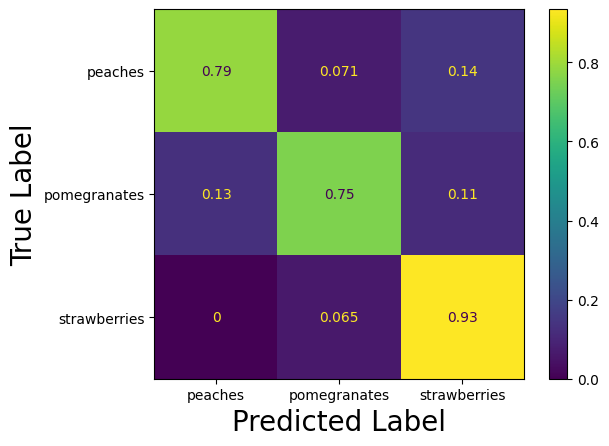

In [196]:
y_pred = model_3.predict(X_test)
y_pred_labels = cat.inverse_transform(y_pred)
y_test_labels = cat.inverse_transform(y_test)
confusion_matrix = metrics.confusion_matrix(y_test_labels, y_pred_labels, normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['peaches','pomegranates','strawberries'])
cm_display.plot()
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)

Very nice! It slightly leans towards predicting more things are strawberries but still with an overall accuracy of 81.6% I'm happy with it for now!

I would like to repeat what I did on model 1 and see if the more confidently labeled images are more accurate:

Text(0.5, 0, 'Predicted Label')

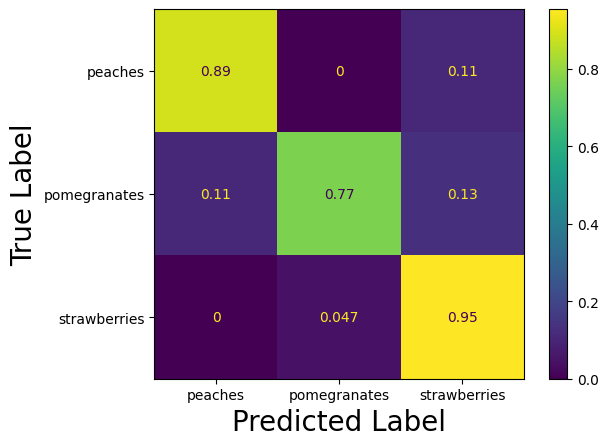

In [197]:
confident_predictions = y_pred[np.max(y_pred,axis=1)>0.9]
confident_truth = y_test[np.max(y_pred,axis=1)>0.9]

conf_pred_labels = cat.inverse_transform(confident_predictions)
conf_test_labels = cat.inverse_transform(confident_truth)

confusion_matrix = metrics.confusion_matrix(conf_test_labels, conf_pred_labels,normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['peaches','pomegranates','strawberries'])

cm_display.plot()
plt.ylabel('True Label', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)

Yes they are a bit higher! Not much but still it's good to know that some of the inaccuracies were on labels that were predicted with lower probablility.

Out of the three models that I have above, I recommend Model 3 as the best one. It could be that even though the other two models were more complicated, they weren't actually what this data set needed. Sometimes a simpler approach is actually better! This model included a convolution, max pool, flatten, dense layers, and then the final classification. It was similar to model 1 except that I took out one of the convolution layers and changed the dimension on one of the dense layers.

## Summary and Key Insights and Findings

I briefly explored a data set containing images of three types of fruit: pomegranates, strawberries, and peaches. To prepare the data, I created image arrays that contain all the data (RGB levels) for each pixel in each image. I also created the target which contained the label for whether each image was pomegranates, strawberries, and peaches. I used one-hot encoding to convert these labels into vectors. I created training and test data by splitting the data with 20% in the test set. Then I created three versions of convolutional neural networks (based on the ones created in the demo labs):

1. Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification (trained with 15 epochs)
2. Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification (trained with 5 epochs)
3. Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification (trained with 15 epochs)

I evaluated the performance of the three models using the overall accuracy metric, and by calculating and plotting the confusion matrix. I also looked at the confusion matrix only for labels where the probability output from the softmax function was greater than 90%. 

It turned out that on this set of data, the final and most simple model worked the best, giving a total accuracy of almost 82%. This model also had slightly higher accuracies when only considering the images that were labeled more confidently.


## Next Steps

There are a lot of different types of changes I could make to these models to keep experimenting. For example, I could try different optimizers (I only used RMSProp here) or different activation functions (I just used Relu and Softmax at the end). The possibilities of deep learning networks seem essentially infinite so there are way more things I could try too with using different types of networks.

Additionally, this project only looked at the fresh fruit images, while there are three sets of data with rotten fruits. I could build networks to distinguish fresh from rotten or distinguish between all 6 categories.